<a href="https://colab.research.google.com/github/Nermen-Salama/nti-course/blob/main/Keras_LSTM_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time-Series Forecasting: Predicting Stock Prices Using An LSTM Model**

https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f


---



In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [3]:
from google.colab import files
uploaded = files.upload()

import io
df2 = pd.read_csv(io.BytesIO(uploaded['TSLA.csv']))
# Dataset is now stored in a Pandas Dataframe




Saving TSLA.csv to TSLA.csv


In [4]:
print('Number of rows and columns:', df2.shape)
df2.head(5)


Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [5]:
training_set = df2.iloc[:800, 1:2].values
test_set = df2.iloc[800:, 1:2].values

In [6]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [7]:
X_train.shape
#(740, 60, 1)

(740, 60, 1)

In [8]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 8s 61ms/step - loss: 0.0628
Epoch 2/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0142
Epoch 3/100
24/24 [==============================] - 1s 60ms/step - loss: 0.0138
Epoch 4/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0132
Epoch 5/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0114
Epoch 6/100
24/24 [==============================] - 1s 60ms/step - loss: 0.0120
Epoch 7/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0108
Epoch 8/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0119
Epoch 9/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0104
Epoch 10/100
24/24 [==============================] - 1s 60ms/step - loss: 0.0106
Epoch 11/100
24/24 [==============================] - 1s 60ms/step - loss: 0.0111
Epoch 12/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0112
Epoch 13/100
24/24 [=====

In [9]:
# Getting the predicted stock price of 2017
dataset_train = df2.iloc[:800, 1:2]
dataset_test = df2.iloc[800:, 1:2]
dataset_test.shape

(459, 1)

In [22]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(20, 479):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# for len(dataset_total) - len(dataset_test) - 60: (459, 60, 1)

(459, 20, 1)


In [23]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [25]:
predicted_stock_price.shape
#(459, 1)

(459, 1)

In [26]:
dataset_test.shape

(459, 1)

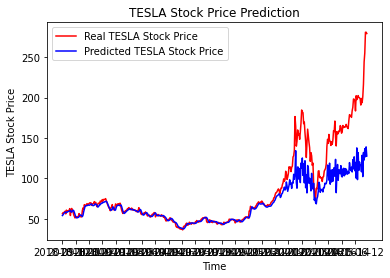

In [27]:
# Visualising the results
plt.plot(df2.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df2.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
#plt.xticks(np.arange(0,459,50))
plt.xticks(np.arange(0,459,20))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()